In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit

from keras.utils import to_categorical
from keras.preprocessing.image import img_to_array, load_img

In [2]:
train_data = pd.read_csv('D:\\DeepLearning\\DeepLearning\\train.csv')
# test_df = pd.read_csv('D:\\DeepLearning\\DeepLearning\\test.csv')
#train_data = pd.read_csv('./train.csv')
# test_df = pd.read_csv('./test.csv')

In [3]:
id =train_data.pop('id') #extract the id from the train data
y = train_data.pop('species') #extract the output values
y = LabelEncoder().fit(y).transform(y) # hot encoding the output labels

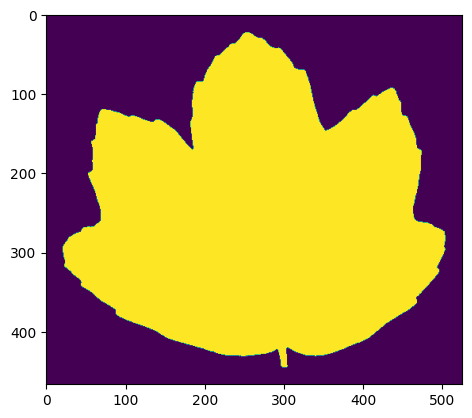

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as img
# reading the image 
# image_path = 'D:\\DeepLearning\\DeepLearning\\images\\1.jpg' 
image_path = './images/1.jpg' 
testImage = img.imread(image_path) 
# displaying the image 
plt.imshow(testImage)
plt.show()

  resize_img(img,max_dim=) 

    -Resize the image, so the maximum side is of size max_dim
    -Returns a new image of the right size
    

In [5]:
def resize_img(img, max_dim=96):
    # Get the axis with the larger dimension
    max_ax = max((0, 1), key=lambda i: img.size[i])
    # Scale both axes so the image's largest dimension is max_dim
    scale = max_dim / float(img.size[max_ax])
    return img.resize((int(img.size[0] * scale), int(img.size[1] * scale)))

Load_image_data function ()


 -It initializes an output array X using NumPy with dimensions determined by the length of ids and the max_dim.


 -Loops through each image ID in the ids array.
 

 -Loads the image using load_img function from the specified directory (root) with the given image ID and .jpg extension, converting it to grayscale.

 -Resizes the loaded image using resize_img function while maintaining its aspect ratio to fit within the max_dim specified.

 -Converts the image to a NumPy array.

 -Inserts the resized and positioned image into the output array X.

In [6]:
root = 'D:\\DeepLearning\\DeepLearning'
# root='.'

def load_image_data(ids, max_dim=96, center=True):
   
    # Initialize the output array
    
    X = np.empty((len(ids), max_dim, max_dim, 1))

    for i, ide in enumerate(ids):
        # Turn the image into an array
        x = resize_img(load_img(os.path.join(root, 'images', str(ide) + '.jpg'), grayscale=True), max_dim=max_dim)
        x = img_to_array(x)
       
        length = x.shape[0]
        width = x.shape[1]
       
        if center:
            h1 = int((max_dim - length) / 2)
            h2 = h1 + length
            w1 = int((max_dim - width) / 2)
            w2 = w1 + width
        else:
            h1, w1 = 0, 0
            h2, w2 = (length, width)

        # Insert into image matrix
       
        X[i, h1:h2, w1:w2, 0:1] = x
        
    # Scale the array values so they are between 0 and 1
    return np.around(X / 255.0)

 Load_train_data( )
    -Loads image training data and

    -splits them into training and cross-validation.

    -Returns one tuple for the training data and one for the validation data. 
    
    -Each tuple is in the orderimages,and labels.
    

In [7]:
def load_train_data(split=0.9, random_state=None):
   
    # Load the image data
    X_img_train = load_image_data(id)
    
    # Split them into validation and cross-validation
    statifiedSplit = StratifiedShuffleSplit(n_splits=1, train_size=split, random_state=random_state)
    for train_indices, valid_indices in statifiedSplit.split(X_img_train, y):
        
        X_img_val, y_val = X_img_train[valid_indices], y[valid_indices]
        X_img_train, y_train = X_img_train[train_indices], y[train_indices]
    
    return (X_img_train, y_train), (X_img_val, y_val)

load_test_data( )    
    -Loads the pre-extracted feature and image test data.
    
    -Returns a tuple in the order ids, pre-extracted features,
    and images.
    

In [8]:
def load_test_data():
   
    # Load the image data
    X_img_test = load_image_data(id)
    return id, X_img_test

In [9]:
# Load train and test data
(X_img_train, y_train), (X_img_val, y_val) = load_train_data(random_state=7)
id_test, X_img_test = load_test_data()

# Convert labels to categorical if needed
y_train_categorical = to_categorical(y_train)
y_val_categorical = to_categorical(y_val)

print('Training data loaded!')


C:\Users\Shaima\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(
C:\Users\Shaima\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


Training data loaded!


Data Augmentation can be a good enhancement in the training stage

In [10]:
from keras.preprocessing.image import ImageDataGenerator, NumpyArrayIterator, array_to_img

print('Creating Data Augmenter...')
imgen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')
imgen_train = imgen.flow(X_img_train, y_train_categorical, seed=np.random.randint(1, 10000))
print('Finished making data augmenter...')

Creating Data Augmenter...
Finished making data augmenter...


In [13]:
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten, Input

def leaf_classification_model1():
    # Define the image input
    image = Input(shape=(96, 96, 1), name='image')
    # Pass it through the first convolutional layer
    x = Conv2D(8, (5, 5), input_shape=(96, 96, 1), padding='same')(image)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

    # Now through the second convolutional layer
    x = Conv2D(32, (5, 5), padding='same')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

    # Flatten our array
    x = Flatten()(x)

    # Add a fully connected layer just like in a normal MLP
    x = Dense(100, activation='relu')(x)
    x = Dropout(0.5)(x)

    # Get the final output
    out = Dense(99, activation='softmax')(x)
    
    # Create the model
    model = Model(inputs=image, outputs=out)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

    return model

model_1 =leaf_classification_model1()

In [14]:
print(y_train)

[81 62 32 19 43 20 55 22 38 27 43 64 18 31 27 57 94 98 72 61 16 56 53 10
 33 54 79 60 82 59 83  3 48 19 77 12 75 12 82 15 61 37 58 92 92 20 91 44
 94 22 73 74 97 62 78 70 22 88 65 95 69 59 80 69 65 32 34 42 69 97 17 19
 54 56  7 30  0 74 62 93 82 43  8 95 83 17 65 31 30  0  5 92 28 45 94 16
 76  6 41 25 14 28 80 81 49 22 51 87 52 90 58  1 97 26 97  0 59  6  7 41
 55 16  4 30 25 12 29 34  1 88 44 75 96 34 15  1 27  5 65 41  4 36 29 80
 56  7 67 75 12 32 79  0 98 31 73 35 11 12 48 11 42  1 98 70 41 18 88  1
 86 20 91 38 21 85 26 59 57 48 89 12 49  7 40 47 61 71 96 40 13 10 88 85
 26 68 58 80 45 62 33 25  3 45 47 65 25  5 70 38 78 84 49 91 64 76 41 50
 39 36 96 61 77 81 67 24 54  1 55 39 52 21 40 27 32 69 70 13 72 86 10 47
 30 64 39 60 66 57 31 36 90 97 23 60 89 89 78 44 63  2 81 84 37 93 53 31
 10 87 15 25 39 14 34 55  1 10 29 66  3 23 42 36 44 46 93 55 43  9 49 90
 27 95  2 12 77 83 35 46 34 93 92 98 84 41 46 52 62  5 63 62 21 23 40 79
  2 75 86  8 61 78 84 13  9 91 54 94 34 31 37 47 12

In [15]:
print(y_train_categorical)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Train the model without any optimizers , just two Conv layers and dropout

In [16]:
history = model_1.fit(
    X_img_train,
    y_train_categorical,  # Use the categorical labels
    epochs=50,
    validation_split=0.1,
    verbose=1
)

Epoch 1/50


26/26 [==============================] - 2s 38ms/step - loss: 4.6470 - accuracy: 0.0225 - val_loss: 4.4393 - val_accuracy: 0.0111
Epoch 2/50
26/26 [==============================] - 1s 28ms/step - loss: 4.2741 - accuracy: 0.0587 - val_loss: 3.9616 - val_accuracy: 0.0778
Epoch 3/50
26/26 [==============================] - 1s 28ms/step - loss: 3.7071 - accuracy: 0.1386 - val_loss: 3.4412 - val_accuracy: 0.2000
Epoch 4/50
26/26 [==============================] - 1s 27ms/step - loss: 3.3454 - accuracy: 0.1885 - val_loss: 2.9043 - val_accuracy: 0.2444
Epoch 5/50
26/26 [==============================] - 1s 31ms/step - loss: 2.9964 - accuracy: 0.2597 - val_loss: 2.6225 - val_accuracy: 0.3222
Epoch 6/50
26/26 [==============================] - 1s 38ms/step - loss: 2.5725 - accuracy: 0.3296 - val_loss: 2.2358 - val_accuracy: 0.4000
Epoch 7/50
26/26 [==============================] - 1s 32ms/step - loss: 2.3590 - accuracy: 0.3683 - val_loss: 2.2285 - val_accuracy: 0.4222
Epoch 8/50


In [17]:
# Evaluate the model on the test data
evaluation = model_1.evaluate(X_img_val ,y_val_categorical, verbose=1)

# The evaluate method returns the loss and any additional metrics specified during model compilation
print(f"Test Loss: {evaluation[0]}")
print(f"Test Accuracy: {evaluation[1]}")

4/4 [==============================] - 0s 7ms/step - loss: 1.8852 - accuracy: 0.7374
Test Loss: 1.8852269649505615
Test Accuracy: 0.7373737096786499


Evaluating between different optimizers

In [41]:
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

optimizers = ['sgd', 'adam', 'rmsprop']


for optimizer_name in optimizers:
    # Clear previous model sessions to avoid conflicts
    # keras.backend.clear_session()
    K.clear_session()
    
    # Create a new model
    model = leaf_classification_model1()

    # Compile the model with the current optimizer
    model.compile(loss='categorical_crossentropy', optimizer=optimizer_name, metrics=['accuracy'])

    # Display the current optimizer
    print(f"\nTraining with optimizer: {optimizer_name}")

    # Fit the model to your training data (adjust X_train_resized and y_categorical accordingly)
    history = model.fit(X_img_train, y_train_categorical, epochs=50, validation_split=0.1, verbose=1)

    # Evaluate the model on your test data (adjust X_test_filtered_resized and y_test_categorical accordingly)
    # test_loss, test_accuracy = model.evaluate(X_img_val, y_val_categorical)
    # print(f"Test Accuracy with {optimizer_name}: {test_accuracy}")


Training with optimizer: sgd
Epoch 1/50
26/26 [==============================] - 2s 38ms/step - loss: 4.5921 - accuracy: 0.0112 - val_loss: 4.5477 - val_accuracy: 0.0222
Epoch 2/50
26/26 [==============================] - 1s 29ms/step - loss: 4.5442 - accuracy: 0.0162 - val_loss: 4.5223 - val_accuracy: 0.0111
Epoch 3/50
26/26 [==============================] - 1s 27ms/step - loss: 4.5173 - accuracy: 0.0325 - val_loss: 4.5053 - val_accuracy: 0.0222
Epoch 4/50
26/26 [==============================] - 1s 30ms/step - loss: 4.4654 - accuracy: 0.0312 - val_loss: 4.5104 - val_accuracy: 0.0444
Epoch 5/50
26/26 [==============================] - 1s 30ms/step - loss: 4.4333 - accuracy: 0.0287 - val_loss: 4.4830 - val_accuracy: 0.0111
Epoch 6/50
26/26 [==============================] - 1s 29ms/step - loss: 4.4331 - accuracy: 0.0250 - val_loss: 4.4300 - val_accuracy: 0.0667
Epoch 7/50
26/26 [==============================] - 1s 28ms/step - loss: 4.3838 - accuracy: 0.0350 - val_loss: 4.4069 - val_


Training with optimizer: sgd

Epoch 1/50
26/26 [==============================] - 1s 34ms/step - loss: 4.5876 - accuracy: 0.0150 - val_loss: 4.5939 - val_accuracy: 0.0333
Epoch 2/50
26/26 [==============================] - 1s 26ms/step - loss: 4.5806 - accuracy: 0.0162 - val_loss: 4.5805 - val_accuracy: 0.0333
Epoch 3/50
26/26 [==============================] - 1s 25ms/step - loss: 4.5601 - accuracy: 0.0187 - val_loss: 4.5703 - val_accuracy: 0.0556
Epoch 4/50
26/26 [==============================] - 1s 25ms/step - loss: 4.5489 - accuracy: 0.0237 - val_loss: 4.5575 - val_accuracy: 0.0556
Epoch 5/50
26/26 [==============================] - 1s 25ms/step - loss: 4.5010 - accuracy: 0.0275 - val_loss: 4.5191 - val_accuracy: 0.0111
Epoch 6/50
26/26 [==============================] - 1s 26ms/step - loss: 4.4591 - accuracy: 0.0312 - val_loss: 4.4757 - val_accuracy: 0.0444
Epoch 7/50
26/26 [==============================] - 1s 26ms/step - loss: 4.4154 - accuracy: 0.0275 - val_loss: 4.4969 - val

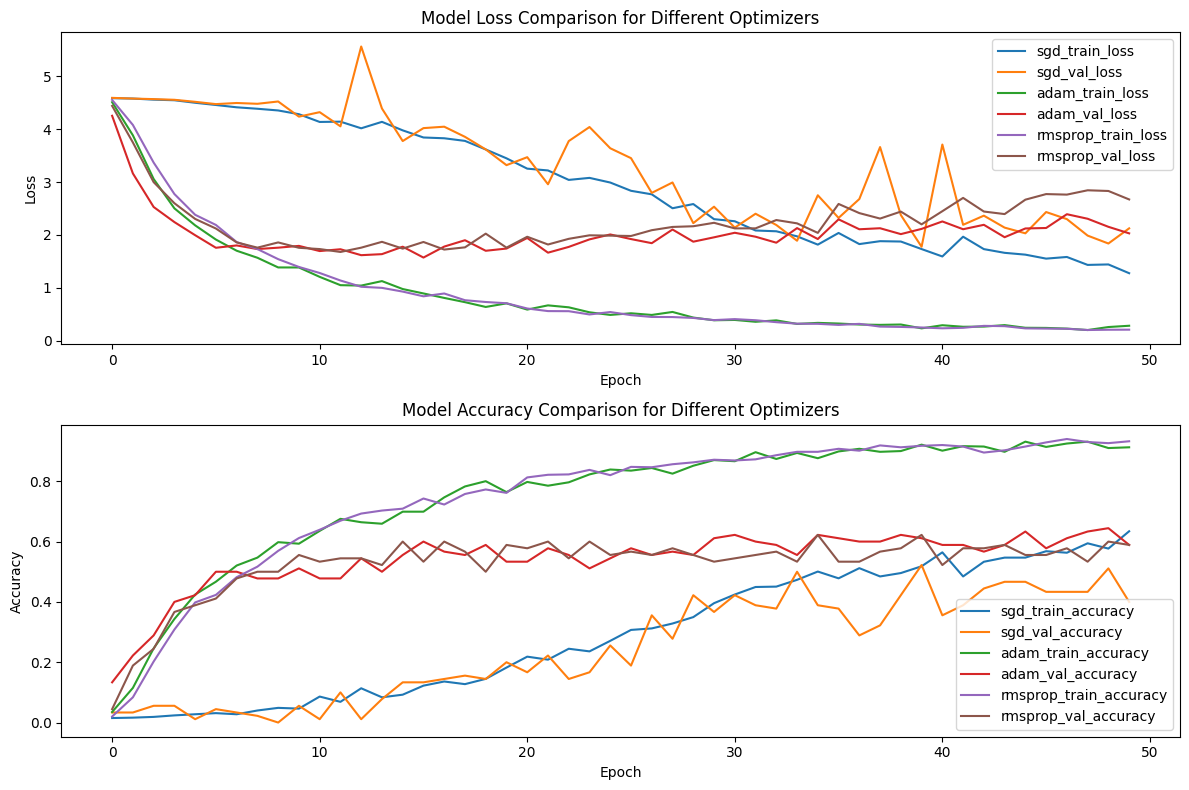

In [37]:
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras import backend as K

# Define your model creation function (you can use your existing model creation logic)
def create_model(optimizer):
    model = leaf_classification_model1()
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# List of optimizers to try
optimizers = ['sgd', 'adam', 'rmsprop']

# Initialize a list to store training history for each optimizer
history_list = []

# Iterate through each optimizer
for optimizer_name in optimizers:
    # Clear the Keras session to avoid any conflicts
    K.clear_session()

    # Create the model with the current optimizer
    model = create_model(optimizer=optimizer_name)

    # Print optimizer name before starting epochs
    print(f"\nTraining with optimizer: {optimizer_name}\n")

    # Train the model and store the training history
    history = model.fit(
        X_img_train,
        y_train_categorical,
        epochs=50,
        validation_split=0.1,
        verbose=1
    )

    # Append the training history to the list
    history_list.append((optimizer_name, history))

# Plot the training and validation losses for each optimizer
plt.figure(figsize=(12, 8))

# Plot Losses
plt.subplot(2, 1, 1)
for optimizer_name, history in history_list:
    plt.plot(history.history['loss'], label=f'{optimizer_name}_train_loss')
    plt.plot(history.history['val_loss'], label=f'{optimizer_name}_val_loss')

plt.title('Model Loss Comparison for Different Optimizers')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(2, 1, 2)
for optimizer_name, history in history_list:
    plt.plot(history.history['accuracy'], label=f'{optimizer_name}_train_accuracy')
    plt.plot(history.history['val_accuracy'], label=f'{optimizer_name}_val_accuracy')

plt.title('Model Accuracy Comparison for Different Optimizers')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Evaluating our second model with the best rmsprop adam

In [19]:
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten, Input

def leaf_classification_model2():
    # Define the image input
    image = Input(shape=(96, 96, 1), name='image')
    # Pass it through the first convolutional layer
    x = Conv2D(8, (5, 5), input_shape=(96, 96, 1), padding='same')(image)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

    # Now through the second convolutional layer
    x = Conv2D(32, (5, 5), padding='same')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

    # Flatten our array
    x = Flatten()(x)

    # Add a fully connected layer just like in a normal MLP
    x = Dense(100, activation='relu')(x)
    x = Dropout(0.5)(x)

    # Get the final output
    out = Dense(99, activation='softmax')(x)
    
    # Create the model
    model = Model(inputs=image, outputs=out)
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

    return model

model_2 =leaf_classification_model2()

In [20]:
history = model_2.fit(
    X_img_train,
    y_train_categorical,  # Use the categorical labels
    epochs=50,
    validation_split=0.1,
    verbose=1
)

Epoch 1/50
26/26 [==============================] - 2s 36ms/step - loss: 4.5703 - accuracy: 0.0325 - val_loss: 4.4456 - val_accuracy: 0.0222
Epoch 2/50
26/26 [==============================] - 1s 33ms/step - loss: 4.0831 - accuracy: 0.1049 - val_loss: 3.7806 - val_accuracy: 0.1667
Epoch 3/50
26/26 [==============================] - 1s 34ms/step - loss: 3.4926 - accuracy: 0.1710 - val_loss: 3.3931 - val_accuracy: 0.2111
Epoch 4/50
26/26 [==============================] - 1s 33ms/step - loss: 2.9199 - accuracy: 0.2809 - val_loss: 2.8596 - val_accuracy: 0.3444
Epoch 5/50
26/26 [==============================] - 1s 31ms/step - loss: 2.5604 - accuracy: 0.3683 - val_loss: 2.2233 - val_accuracy: 0.4333
Epoch 6/50
26/26 [==============================] - 1s 31ms/step - loss: 2.3460 - accuracy: 0.3795 - val_loss: 2.1003 - val_accuracy: 0.4000
Epoch 7/50
26/26 [==============================] - 1s 33ms/step - loss: 2.0381 - accuracy: 0.4532 - val_loss: 2.0666 - val_accuracy: 0.4000
Epoch 8/50
26

In [21]:
# Evaluate the model on the test data
evaluation = model_2.evaluate(X_img_val ,y_val_categorical, verbose=1)

# The evaluate method returns the loss and any additional metrics specified during model compilation
print(f"Test Loss: {evaluation[0]}")
print(f"Test Accuracy: {evaluation[1]}")

4/4 [==============================] - 0s 8ms/step - loss: 2.0114 - accuracy: 0.7071
Test Loss: 2.011366367340088
Test Accuracy: 0.7070707082748413


our Third model : Try adding more CONV LAYERS 

In [22]:
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten, Input

def leaf_classification_model3():
    # Define the image input
    image = Input(shape=(96, 96, 1), name='image')
    # Pass it through the first convolutional layer
    x = Conv2D(8, (5, 5), input_shape=(96, 96, 1), padding='same')(image)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

    # Now through the second convolutional layer
    x = Conv2D(32, (5, 5), padding='same')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

    # Now through the third convolutional layer
    x = Conv2D(64, (5, 5), padding='same')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

    # Now through the third convolutional layer
    x = Conv2D(128, (5, 5), padding='same')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)
    
    # Flatten our array
    x = Flatten()(x)

    # Add a fully connected layer just like in a normal MLP
    x = Dense(100, activation='relu')(x)
    x = Dropout(0.5)(x)

    # Get the final output
    out = Dense(99, activation='softmax')(x)
    
    # Create the model
    model = Model(inputs=image, outputs=out)
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

    return model

model_3 = leaf_classification_model3()

In [170]:
history = model_3.fit(
    X_img_train,
    y_train_categorical,  # Use the categorical labels
    epochs=50,
    validation_split=0.1,
    verbose=1
)

Epoch 1/50
26/26 [==============================] - 1s 43ms/step - loss: 0.2234 - accuracy: 0.9288 - val_loss: 1.3171 - val_accuracy: 0.7556
Epoch 2/50
26/26 [==============================] - 1s 36ms/step - loss: 0.2321 - accuracy: 0.9213 - val_loss: 1.1602 - val_accuracy: 0.7556
Epoch 3/50
26/26 [==============================] - 1s 36ms/step - loss: 0.2364 - accuracy: 0.9176 - val_loss: 1.7279 - val_accuracy: 0.7778
Epoch 4/50
26/26 [==============================] - 1s 39ms/step - loss: 0.2296 - accuracy: 0.9176 - val_loss: 1.7593 - val_accuracy: 0.7444
Epoch 5/50
26/26 [==============================] - 1s 34ms/step - loss: 0.1898 - accuracy: 0.9338 - val_loss: 1.6058 - val_accuracy: 0.7889
Epoch 6/50
26/26 [==============================] - 1s 37ms/step - loss: 0.2053 - accuracy: 0.9338 - val_loss: 1.5781 - val_accuracy: 0.7222
Epoch 7/50
26/26 [==============================] - 1s 41ms/step - loss: 0.2127 - accuracy: 0.9301 - val_loss: 1.6774 - val_accuracy: 0.7556
Epoch 8/50
26

In [ ]:
# Evaluate the model on the test data
evaluation = model_3.evaluate(X_img_val ,y_val_categorical, verbose=1)

# The evaluate method returns the loss and any additional metrics specified during model compilation
print(f"Test Loss: {evaluation[0]}")
print(f"Test Accuracy: {evaluation[1]}")

4/4 [==============================] - 0s 9ms/step - loss: 1.9306 - accuracy: 0.7374
Test Loss: 1.9306026697158813
Test Accuracy: 0.7373737096786499


Add Batch normalization to the convolutional layers 

In [ ]:
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten, Input ,BatchNormalization

def leaf_classification_model4():
    # Define the image input
    image = Input(shape=(96, 96, 1), name='image')
    # Pass it through the first convolutional layer
    x = Conv2D(8, (5, 5), input_shape=(96, 96, 1), padding='same')(image)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)
    x = BatchNormalization()(x) 

    # Now through the second convolutional layer
    x = Conv2D(32, (5, 5), padding='same')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)
    x = BatchNormalization()(x) 

    # Now through the third convolutional layer
    x = Conv2D(64, (5, 5), padding='same')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)
    x = BatchNormalization()(x) 

    # Now through the third convolutional layer
    x = Conv2D(128, (5, 5), padding='same')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)
    x = BatchNormalization()(x) 
    
    # Flatten our array
    x = Flatten()(x)

    # Add a fully connected layer just like in a normal MLP
    x = Dense(100, activation='relu')(x)
    x = Dropout(0.5)(x)

    # Get the final output
    out = Dense(99, activation='softmax')(x)
    
    # Create the model
    model = Model(inputs=image, outputs=out)
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

    return model

model_4 = leaf_classification_model4()

In [ ]:
history = model_4.fit(
    X_img_train,
    y_train_categorical,  # Use the categorical labels
    epochs=50,
    validation_split=0.1,
    verbose=1
)

Epoch 1/50
26/26 [==============================] - 2s 55ms/step - loss: 4.8785 - accuracy: 0.0187 - val_loss: 4.5374 - val_accuracy: 0.0111
Epoch 2/50
26/26 [==============================] - 1s 37ms/step - loss: 4.5996 - accuracy: 0.0250 - val_loss: 4.5075 - val_accuracy: 0.0000e+00
Epoch 3/50
26/26 [==============================] - 1s 37ms/step - loss: 4.4455 - accuracy: 0.0337 - val_loss: 4.7015 - val_accuracy: 0.0000e+00
Epoch 4/50
26/26 [==============================] - 1s 36ms/step - loss: 4.3135 - accuracy: 0.0712 - val_loss: 4.7876 - val_accuracy: 0.0444
Epoch 5/50
26/26 [==============================] - 1s 46ms/step - loss: 4.1161 - accuracy: 0.0999 - val_loss: 4.8426 - val_accuracy: 0.0556
Epoch 6/50
26/26 [==============================] - 1s 41ms/step - loss: 3.8875 - accuracy: 0.1286 - val_loss: 5.0767 - val_accuracy: 0.0556
Epoch 7/50
26/26 [==============================] - 1s 41ms/step - loss: 3.6372 - accuracy: 0.1648 - val_loss: 5.1759 - val_accuracy: 0.0667
Epoch

In [ ]:
# Evaluate the model on the test data
evaluation = model_4.evaluate(X_img_val ,y_val_categorical, verbose=1)

# The evaluate method returns the loss and any additional metrics specified during model compilation
print(f"Test Loss: {evaluation[0]}")
print(f"Test Accuracy: {evaluation[1]}")

4/4 [==============================] - 0s 15ms/step - loss: 1.4146 - accuracy: 0.7172
Test Loss: 1.4146080017089844
Test Accuracy: 0.7171717286109924


Add l2-regularization term instead of using the drop of 0.5

In [ ]:
from keras.models import Model
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Input, BatchNormalization, Dropout
from keras.regularizers import l2

def leaf_classification_model_with_l2_and_new_conv():
    # Define the image input
    image = Input(shape=(96, 96, 1), name='image')
    # Pass it through the first convolutional layer
    x = Conv2D(8, (5, 5), input_shape=(96, 96, 1), padding='same', kernel_regularizer=l2(0.01))(image)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)
    x = BatchNormalization()(x) 

    # Now through the second convolutional layer
    x = Conv2D(32, (5, 5), padding='same', kernel_regularizer=l2(0.01))(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)
    x = BatchNormalization()(x) 

    # Now through the third convolutional layer
    x = Conv2D(64, (5, 5), padding='same', kernel_regularizer=l2(0.01))(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)
    x = BatchNormalization()(x) 

    # Now through the fourth convolutional layer
    x = Conv2D(128, (5, 5), padding='same', kernel_regularizer=l2(0.01))(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)
    x = BatchNormalization()(x) 

    # New convolutional layer (added)
    x = Conv2D(256, (5, 5), padding='same', kernel_regularizer=l2(0.01))(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)
    x = BatchNormalization()(x) 

    # Flatten our array
    x = Flatten()(x)

    # Add a fully connected layer just like in a normal MLP
    x = Dense(100, activation='relu', kernel_regularizer=l2(0.01))(x)

    # Get the final output
    out = Dense(99, activation='softmax')(x)
    
    # Create the model
    model = Model(inputs=image, outputs=out)
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

    return model

model_with_l2_and_new_conv = leaf_classification_model_with_l2_and_new_conv()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [ ]:
history = model_with_l2_and_new_conv.fit(
    X_img_train,
    y_train_categorical,  # Use the categorical labels
    epochs=50,
    validation_split=0.1,
    # callbacks=[early_stop],
    verbose=1,
)

Epoch 1/50
26/26 [==============================] - 2s 50ms/step - loss: 9.6278 - accuracy: 0.0312 - val_loss: 9.0184 - val_accuracy: 0.0111
Epoch 2/50
26/26 [==============================] - 1s 34ms/step - loss: 8.0725 - accuracy: 0.0949 - val_loss: 8.4260 - val_accuracy: 0.0111
Epoch 3/50
26/26 [==============================] - 1s 34ms/step - loss: 6.5217 - accuracy: 0.1935 - val_loss: 8.1836 - val_accuracy: 0.0222
Epoch 4/50
26/26 [==============================] - 1s 33ms/step - loss: 5.5435 - accuracy: 0.2784 - val_loss: 8.4811 - val_accuracy: 0.0333
Epoch 5/50
26/26 [==============================] - 1s 34ms/step - loss: 4.5704 - accuracy: 0.3945 - val_loss: 7.7503 - val_accuracy: 0.0222
Epoch 6/50
26/26 [==============================] - 1s 34ms/step - loss: 3.8393 - accuracy: 0.4657 - val_loss: 8.1175 - val_accuracy: 0.0111
Epoch 7/50
26/26 [==============================] - 1s 34ms/step - loss: 3.4347 - accuracy: 0.5481 - val_loss: 9.3739 - val_accuracy: 0.0333
Epoch 8/50
26

In [ ]:
# Evaluate the model on the test data
evaluation = model_with_l2_and_new_conv.evaluate(X_img_val ,y_val_categorical, verbose=1)

# The evaluate method returns the loss and any additional metrics specified during model compilation
print(f"Test Loss: {evaluation[0]}")
print(f"Test Accuracy: {evaluation[1]}")

4/4 [==============================] - 0s 19ms/step - loss: 2.4130 - accuracy: 0.7172
Test Loss: 2.412970781326294
Test Accuracy: 0.7171717286109924


Trying different learning rates

In [ ]:
from keras.callbacks import LearningRateScheduler

# Define your learning rate schedule function
def lr_schedule(epoch):
    """
    Learning rate schedule function.

    Parameters:
    - epoch: The current epoch number.

    Returns:
    - lr: The learning rate for the current epoch.
    """
    initial_lr = 0.01  # You can set your initial learning rate here
    decay_factor = 0.9  # You can adjust the decay factor as needed
    decay_epoch = 10  # You can adjust the number of epochs before decaying the learning rate

    lr = initial_lr * (decay_factor ** (epoch // decay_epoch))
    print(lr)
    return lr

# Create a LearningRateScheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)


In [ ]:

model_3 = leaf_classification_model3()
model_3.fit(
  X_img_train,
  y_train_categorical,  # Use the categorical labels
  epochs=30,
  callbacks=[lr_scheduler],
  validation_split=0.1,
  verbose=1)
evaluation = model_3.evaluate(X_img_val, y_val_categorical, verbose=1)

Epoch 1/30
26/26 [==============================] - 1s 34ms/step - loss: 41.7802 - accuracy: 0.0012 - val_loss: 4.6171 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 2/30
26/26 [==============================] - 1s 29ms/step - loss: 4.6020 - accuracy: 0.0100 - val_loss: 4.6297 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 3/30
26/26 [==============================] - 1s 25ms/step - loss: 4.6011 - accuracy: 0.0062 - val_loss: 4.6394 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 4/30
26/26 [==============================] - 1s 24ms/step - loss: 4.5995 - accuracy: 0.0050 - val_loss: 4.6475 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 5/30
26/26 [==============================] - 1s 24ms/step - loss: 4.5989 - accuracy: 0.0025 - val_loss: 4.6577 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 6/30
26/26 [==============================] - 1s 24ms/step - loss: 4.5982 - accuracy: 0.0062 - val_loss: 4.6658 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 7/30
26/26 [==============================] -

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

learning_rates = [0.001, 0.01, 0.1, 0.5]  # Define a range of learning rates

# Iterate through learning rates
for lr in learning_rates:
    # Create a new model for each learning rate
    model = leaf_classification_model3()
    
    # Create a new LearningRateScheduler for the current learning rate
    lr_scheduler = LearningRateScheduler(lambda epoch: lr)
    
    # Compile the model
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model with the current learning rate
    model.fit(
        X_img_train,
        y_train_categorical,
        epochs=30,
        callbacks=[lr_scheduler],
        validation_split=0.1,
        verbose=0
    )
    
    # Evaluate model performance on validation data
    evaluation = model.evaluate(X_img_val, y_val_categorical, verbose=0)
    print(f"Learning Rate: {lr}, Validation Loss: {evaluation[0]}, Validation Accuracy: {evaluation[1]}")

Learning Rate: 0.001, Validation Loss: 1.4208943843841553, Validation Accuracy: 0.7373737096786499
Learning Rate: 0.01, Validation Loss: 4.602180480957031, Validation Accuracy: 0.010101010091602802
Learning Rate: 0.1, Validation Loss: 4.609646320343018, Validation Accuracy: 0.010101010091602802
Learning Rate: 0.5, Validation Loss: 4.6826605796813965, Validation Accuracy: 0.010101010091602802


we will take the model corresponding to the largest testing accuracy which is model_3

In [ ]:
model_3 = leaf_classification_model3()

In [ ]:
predictions = model_3.predict(X_img_val)

# Assuming y_val_cat and predicted_labels_cat are both one-hot encoded
# Convert predicted labels back to class indices for classification_report
predicted_labels_indices = np.argmax(predictions, axis=1)

# Convert y_val_cat back to class indices if needed
y_val_indices = np.argmax(y_val_categorical, axis=1)

# Generate the classification report
classification_rep = classification_report(y_val_indices, predicted_labels_indices)
print("Classification Report:")
print(classification_rep)

4/4 [==============================] - 0s 10ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       0.50      1.00      0.67         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       0.00      0.00      0.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       0.50      1.00      0.67         1
          13       0.50      1.00      0.67         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
      

C:\Users\Shaima\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shaima\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shaima\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1

In [ ]:
conf_matrix = confusion_matrix(y_val_indices, predicted_labels_indices)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


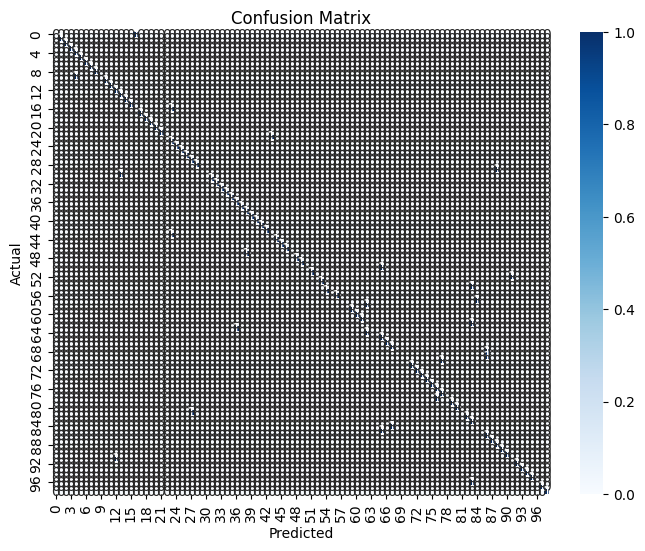

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have conf_matrix computed

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
def visualize_layers(model, img):
    # Extract intermediate layer outputs
    layer_outputs = [layer.output for layer in model.layers]

    # Create a model that returns the layer outputs
    activation_model = Model(inputs=model.input, outputs=layer_outputs)

    # Get the activations for the input image
    activations = activation_model.predict(img.reshape(1, *img.shape))

    # Plot the activations
    layer_names = [layer.name for layer in model.layers]

    for layer_name, layer_activation in zip(layer_names, activations):
        if 'conv' in layer_name:
            # Plot only Convolutional layers
            plt.figure(figsize=(100, 100))
            for i in range(layer_activation.shape[3]):
                plt.subplot(1, layer_activation.shape[3], i + 1)
                plt.imshow(layer_activation[0, :, :, i], cmap='viridis')
                plt.title(f'{layer_name} - Filter {i + 1}')
                plt.axis('off')
            plt.show()

1/1 [==============================] - 0s 88ms/step


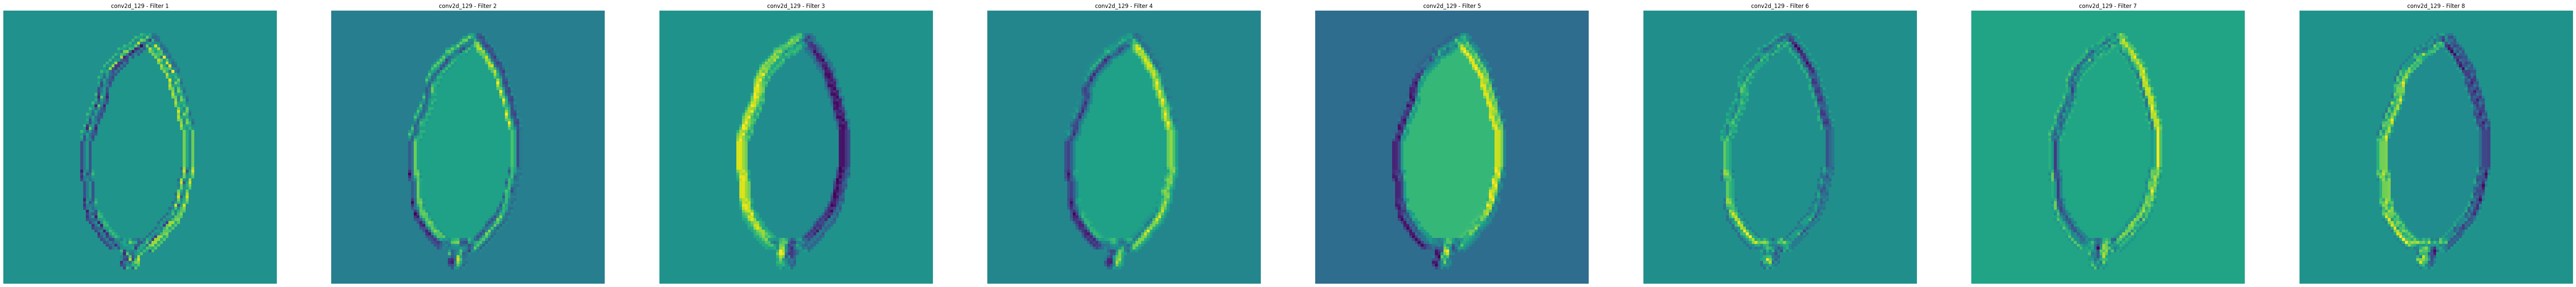

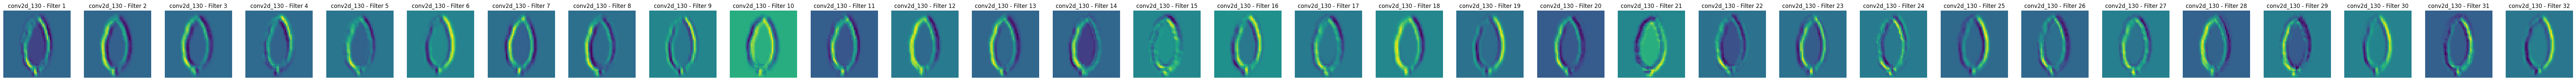

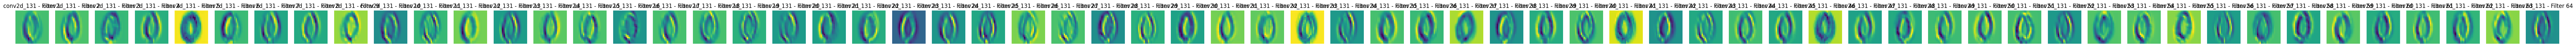

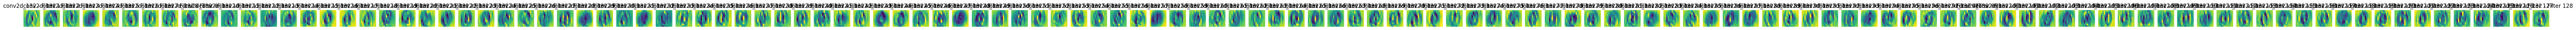

In [ ]:
visualize_layers(model_3, X_img_train[0])

In [ ]:
for layer in model.layers:
    print(layer.name)

image
conv2d_121
activation_121
max_pooling2d_119
conv2d_122
activation_122
max_pooling2d_120
conv2d_123
activation_123
max_pooling2d_121
conv2d_124
activation_124
max_pooling2d_122
flatten_29
dense_58
dropout_15
dense_59


Filter Visualization


  -Instead of displaying the activations, you can directly visualize the filters learned by the convolutional layers. This helps understand what patterns or features each filter is sensitive to.

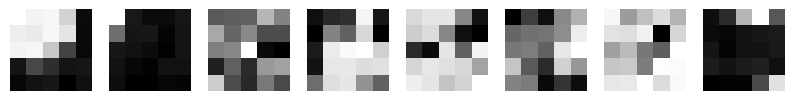

In [ ]:
def visualize_filters(model):
    layer_dict = dict([(layer.name, layer) for layer in model.layers])
    layer_name = 'conv2d_121'  # Change this to your desired convolutional layer
    filter_weights = layer_dict[layer_name].get_weights()[0]
    plt.figure(figsize=(10, 10))
    for i in range(filter_weights.shape[3]):
        plt.subplot(8, 8, i+1)
        plt.imshow(filter_weights[:, :, 0, i], cmap='gray')
        plt.axis('off')
    plt.show()
visualize_filters(model)

In [11]:
from keras.layers import Input
from keras.models import Model
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Input, BatchNormalization, Dropout
from keras.regularizers import l2
import keras
lr_values= [0.001,0.01,0.1,1]
def combined_models_Learning_rate():
    # Define the image input
    image = Input(shape=(96, 96, 1), name='image')
    # Pass it through the first convolutional layer
    x = Conv2D(8, (5, 5), input_shape=(96, 96, 1), padding='same')(image)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

    # Now through the second convolutional layer
    x = Conv2D(32, (5, 5), padding='same')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

    # Flatten our array
    x = Flatten()(x)

    # Add a fully connected layer just like in a normal MLP
    x = Dense(100, activation='relu')(x)
    x = Dropout(0.5)(x)

    # Get the final output
    out = Dense(99, activation='softmax')(x)

    # Create the model
    model1 = Model(inputs=image, outputs=out)
    model2 = Model(inputs=image, outputs=out)
    model3 = Model(inputs=image, outputs=out)
    model4 = Model(inputs=image, outputs=out)

    opt1 = keras.optimizers.RMSprop(learning_rate=0.001)
    opt2 = keras.optimizers.RMSprop(learning_rate=0.01) #best
    opt3 = keras.optimizers.RMSprop(learning_rate=0.1)
    opt4 = keras.optimizers.RMSprop(learning_rate=1)

    model1.compile(loss='categorical_crossentropy', optimizer=opt1, metrics=['accuracy'])
    model2.compile(loss='categorical_crossentropy', optimizer=opt2, metrics=['accuracy'])
    model3.compile(loss='categorical_crossentropy', optimizer=opt3, metrics=['accuracy'])
    model4.compile(loss='categorical_crossentropy', optimizer=opt4, metrics=['accuracy'])

    return [model1,model2,model3,model4]
    

In [12]:
models_LR = combined_models_Learning_rate()

In [13]:
i = 0
for model_lr in models_LR:

  model_lr.fit(
    X_img_train,
    y_train_categorical,  # Use the categorical labels
    epochs=50,
    validation_split=0.1,
    verbose=1)
  evaluation = model_lr.evaluate(X_img_val, y_val_categorical, verbose=1)

  # The evaluate method returns the loss and any additional metrics specified during model compilation
  print(f"Test Loss  model_lr = {lr_values[i]}: {evaluation[0]}")
  print(f"Test Accuracy of model_lr = {lr_values[i]}: {evaluation[1]}")
  i+=1

Epoch 1/50


26/26 [==============================] - 2s 34ms/step - loss: 4.4150 - accuracy: 0.0487 - val_loss: 4.0930 - val_accuracy: 0.0333
Epoch 2/50
26/26 [==============================] - 1s 28ms/step - loss: 3.5702 - accuracy: 0.1735 - val_loss: 3.3661 - val_accuracy: 0.2222
Epoch 3/50
26/26 [==============================] - 1s 21ms/step - loss: 3.0097 - accuracy: 0.2547 - val_loss: 2.8087 - val_accuracy: 0.3444
Epoch 4/50
26/26 [==============================] - 1s 23ms/step - loss: 2.5106 - accuracy: 0.3883 - val_loss: 2.2928 - val_accuracy: 0.4222
Epoch 5/50
26/26 [==============================] - 1s 25ms/step - loss: 2.2001 - accuracy: 0.4444 - val_loss: 1.9707 - val_accuracy: 0.5000
Epoch 6/50
26/26 [==============================] - 1s 23ms/step - loss: 1.9822 - accuracy: 0.4557 - val_loss: 2.0517 - val_accuracy: 0.4222
Epoch 7/50
26/26 [==============================] - 1s 23ms/step - loss: 1.7849 - accuracy: 0.4969 - val_loss: 1.8227 - val_accuracy: 0.5222
Epoch 8/50
